# capstone 3 <br>
predicting the price of home in the next 5 and 10 years in california with zillow data obtained from kaggle's zillow data. 
https://www.kaggle.com/maedemaftouni/us-real-estate-market-trends-visualization/data

check suppy and demand or price increases/decreases with historical data to see if its a buyers market or a sellers market. may need to tap into income data to see how the economy of that state is doing. 
texas, california, washington, 

### how are we going to predict the housing priced?
linear regression, logistic regressin. 

## importing python packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1 importing data <br>
1a. state data

In [2]:
df = pd.read_csv('RDC_Inventory_Core_Metrics_State_History.csv')
df.head()

,month_date_yyyymm,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,median_square_feet_yy,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy
0,202107,illinois,il,269900.0,-0.0004,0.0393,32216,0.0923,-0.2511,43.0,...,-0.0772,407847.5151,-0.0225,0.0703,63878,0.0031,-0.1708,0.982804,-0.1764,0.1919
1,202107,virginia,va,378999.0,-0.0026,0.0530,16402,0.1187,-0.2351,32.0,...,-0.1122,553022.6313,-0.0179,0.0776,35023,0.0099,-0.0021,1.135288,-0.2299,0.4987
2,202107,vermont,vt,350000.0,-0.0210,0.0888,1692,0.0702,-0.4540,46.0,...,-0.0562,538348.9867,-0.0319,0.1535,2809,0.0392,-0.3828,0.660165,-0.0495,0.1916
3,202107,indiana,in,239900.0,0.0019,0.0090,8009,0.1766,-0.2552,33.0,...,-0.0650,321529.0468,-0.0033,0.0496,15902,0.0782,-0.2025,0.985516,-0.1812,0.1312
4,202107,oregon,or,525000.0,0.0003,0.1564,7220,0.1365,-0.2933,33.0,...,-0.0649,711752.8358,0.0032,0.1718,18523,0.0303,-0.1643,1.565512,-0.2645,0.3960


In [3]:
df = pd.DataFrame(df)

In [4]:
df.shape

(3112, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   month_date_yyyymm                        3112 non-null   int64  
 1   state                                    3112 non-null   object 
 2   state_id                                 3112 non-null   object 
 3   median_listing_price                     3112 non-null   float64
 4   median_listing_price_mm                  2499 non-null   float64
 5   median_listing_price_yy                  2499 non-null   float64
 6   active_listing_count                     3112 non-null   int64  
 7   active_listing_count_mm                  2499 non-null   float64
 8   active_listing_count_yy                  2499 non-null   float64
 9   median_days_on_market                    3112 non-null   float64
 10  median_days_on_market_mm                 2499 no

In [6]:
df.describe()

,month_date_yyyymm,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,median_days_on_market_mm,median_days_on_market_yy,...,median_square_feet_yy,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy
count,3112.000000,3112.000000,2499.00000,2499.000000,3112.000000,2499.000000,2499.000000,3112.000000,2499.000000,2499.000000,...,2485.000000,3.112000e+03,2499.000000,2499.000000,3112.000000,2499.000000,2499.000000,3112.000000,2499.000000,2499.000000
mean,201860.619537,309722.639414,0.00547,0.069576,22597.419023,-0.014784,-0.160779,71.333066,-0.002182,-0.082485,...,-0.000309,4.913809e+05,0.006064,0.080732,32240.109254,0.004923,-0.056044,0.474512,0.032421,0.231930
std,151.195701,121770.822518,0.02127,0.058155,25743.075283,0.071730,0.208003,24.389591,0.125138,0.159849,...,0.142460,2.657022e+05,0.024310,0.093208,37712.465020,0.098921,0.201976,0.481952,0.157453,0.413621
min,201607.000000,134250.000000,-0.10490,-0.227800,1.000000,-0.360200,-0.712600,7.000000,-0.508065,-0.712963,...,-1.000000,2.077657e+05,-0.120000,-0.217000,1.000000,-0.352300,-0.542400,0.000000,-0.725000,-0.845800
25%,201710.000000,224900.000000,-0.00590,0.035100,6272.750000,-0.060350,-0.295450,55.000000,-0.063074,-0.138538,...,-0.022100,2.966865e+05,-0.006800,0.029900,9002.500000,-0.039600,-0.165200,0.158694,-0.016000,0.005800
50%,201901.000000,281125.000000,0.00030,0.064400,13807.000000,-0.012600,-0.116300,68.500000,0.022472,-0.064378,...,0.001800,3.980736e+05,0.002700,0.060800,20082.000000,0.001200,-0.069600,0.317457,0.001100,0.060900
75%,202004.000000,355082.000000,0.01650,0.097850,27267.000000,0.026750,-0.027750,85.000000,0.080645,-0.010471,...,0.023300,5.958600e+05,0.017100,0.108100,38034.250000,0.042200,0.016050,0.605260,0.043400,0.346600
max,202107.000000,808908.000000,0.23640,0.378000,164441.000000,0.293300,0.844700,210.000000,0.347826,0.878788,...,3.000000,1.943105e+06,0.300500,0.795100,351391.000000,0.969600,1.770700,3.903721,2.403400,3.182600


changing the format of the date to align to a more usable column

In [7]:
date = {'month_date_yyyymm':'Date'}
df['month_date_yyyymm'] = pd.to_datetime(df['month_date_yyyymm'],format = '%Y%m')
df.rename(columns= date, inplace=True)

breaking the days up a little more since its possible to do so

In [8]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Date'] = df['Date'].dt.date

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     3112 non-null   object 
 1   state                                    3112 non-null   object 
 2   state_id                                 3112 non-null   object 
 3   median_listing_price                     3112 non-null   float64
 4   median_listing_price_mm                  2499 non-null   float64
 5   median_listing_price_yy                  2499 non-null   float64
 6   active_listing_count                     3112 non-null   int64  
 7   active_listing_count_mm                  2499 non-null   float64
 8   active_listing_count_yy                  2499 non-null   float64
 9   median_days_on_market                    3112 non-null   float64
 10  median_days_on_market_mm                 2499 no

in efforts to make the dataframe easier to work with, i will sort it based off of states and dates

In [10]:
df = df.sort_values(["state", "Date"], ascending = (True, True)).reset_index(drop = True) # Default is ascending
df

,Date,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,Month,Year
0,2016-07-01,alabama,al,189500.0,NaN,NaN,32896,NaN,NaN,89.0,...,NaN,NaN,34771,NaN,NaN,0.056998,NaN,NaN,7,2016
1,2016-08-01,alabama,al,189000.0,NaN,NaN,32311,NaN,NaN,94.0,...,NaN,NaN,34234,NaN,NaN,0.059515,NaN,NaN,8,2016
2,2016-09-01,alabama,al,187950.0,NaN,NaN,31875,NaN,NaN,96.0,...,NaN,NaN,33633,NaN,NaN,0.055153,NaN,NaN,9,2016
3,2016-10-01,alabama,al,185000.0,NaN,NaN,31186,NaN,NaN,100.0,...,NaN,NaN,32821,NaN,NaN,0.052427,NaN,NaN,10,2016
4,2016-11-01,alabama,al,184900.0,NaN,NaN,30158,NaN,NaN,106.5,...,NaN,NaN,31619,NaN,NaN,0.048445,NaN,NaN,11,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,2021-03-01,wyoming,wy,277500.0,0.0165,0.0341,1420,-0.0773,-0.4345,61.5,...,0.0625,-0.0172,2303,-0.0233,-0.2907,0.621831,0.0897,0.3287,3,2021
3108,2021-04-01,wyoming,wy,281250.0,0.0135,0.0227,1352,-0.0322,-0.4869,55.5,...,0.0267,0.0372,2331,0.0224,-0.2975,0.724112,0.0920,0.4649,4,2021
3109,2021-05-01,wyoming,wy,295000.0,0.0489,0.0539,1385,0.0244,-0.4932,44.0,...,0.0592,0.1151,2404,0.0313,-0.3194,0.735740,0.0116,0.4434,5,2021
3110,2021-06-01,wyoming,wy,312500.0,0.0593,0.0780,1549,0.1184,-0.4590,39.0,...,0.0651,0.1821,2560,0.0649,-0.3236,0.652679,-0.0831,0.3306,6,2021


now that the datafram is sorted, i want to get a broad idea of how the US real estate market did as a whole between the years 2016 and 2021. the following plot does a good job featuring the trends experienced. 

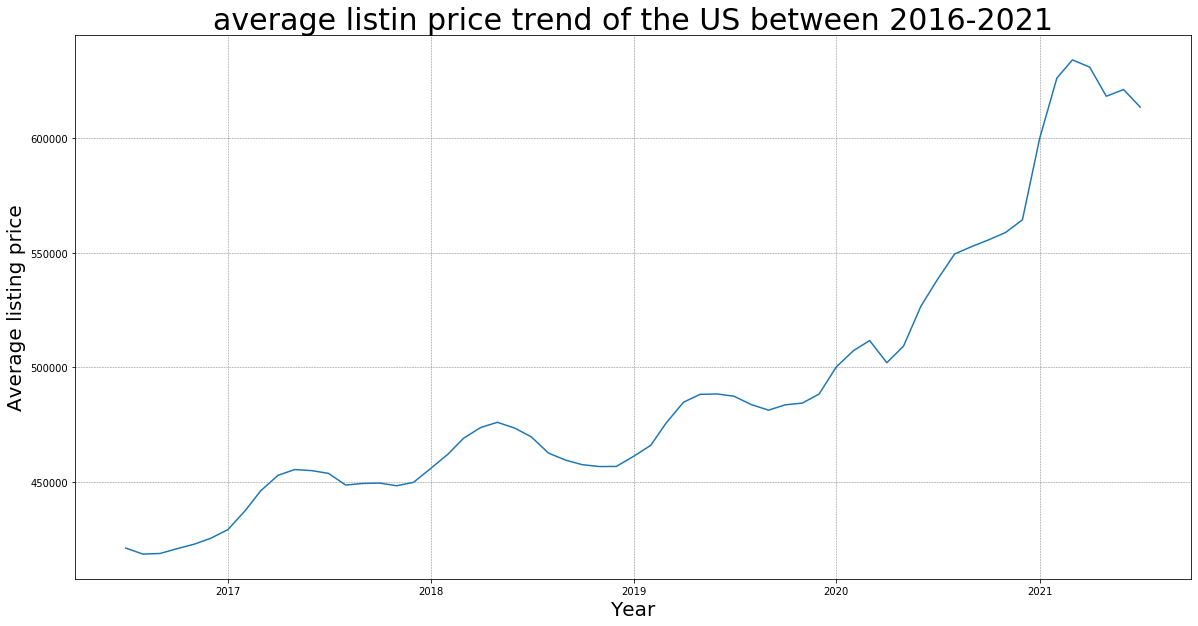

In [11]:
plt.figure(figsize=(20, 10))
avglisting = df.groupby(['Date'])['average_listing_price'].mean()
_ = plt.plot(avglisting)
_ = plt.grid(color='grey', linestyle='--', linewidth=0.5)
_ = plt.xlabel('Year', fontsize = 20)
_ = plt.ylabel('Average listing price', fontsize = 20)
_= plt.title('average listin price trend of the US between 2016-2021', fontsize = 30)

As you can see from the plot above, the housing market has risen since 2016, especially so in the year of 2020. 
<br>
its interesting to see that each year ends with a positive slope indicating that the housing market trends upward in the end of the year while the middle of the year consist of a downward trend. based off of this plot, its best to buy a house during summer/spring and sell a house during whinter/fall. there is however, a drastic change in the trend that begins part way though the year 2020 as the average housing price skyrocekets. the average price of a home rose more in the year 2020 than it did between the years 2016 up to 2020 combined.

we will now look into which states have experienced the most price increases

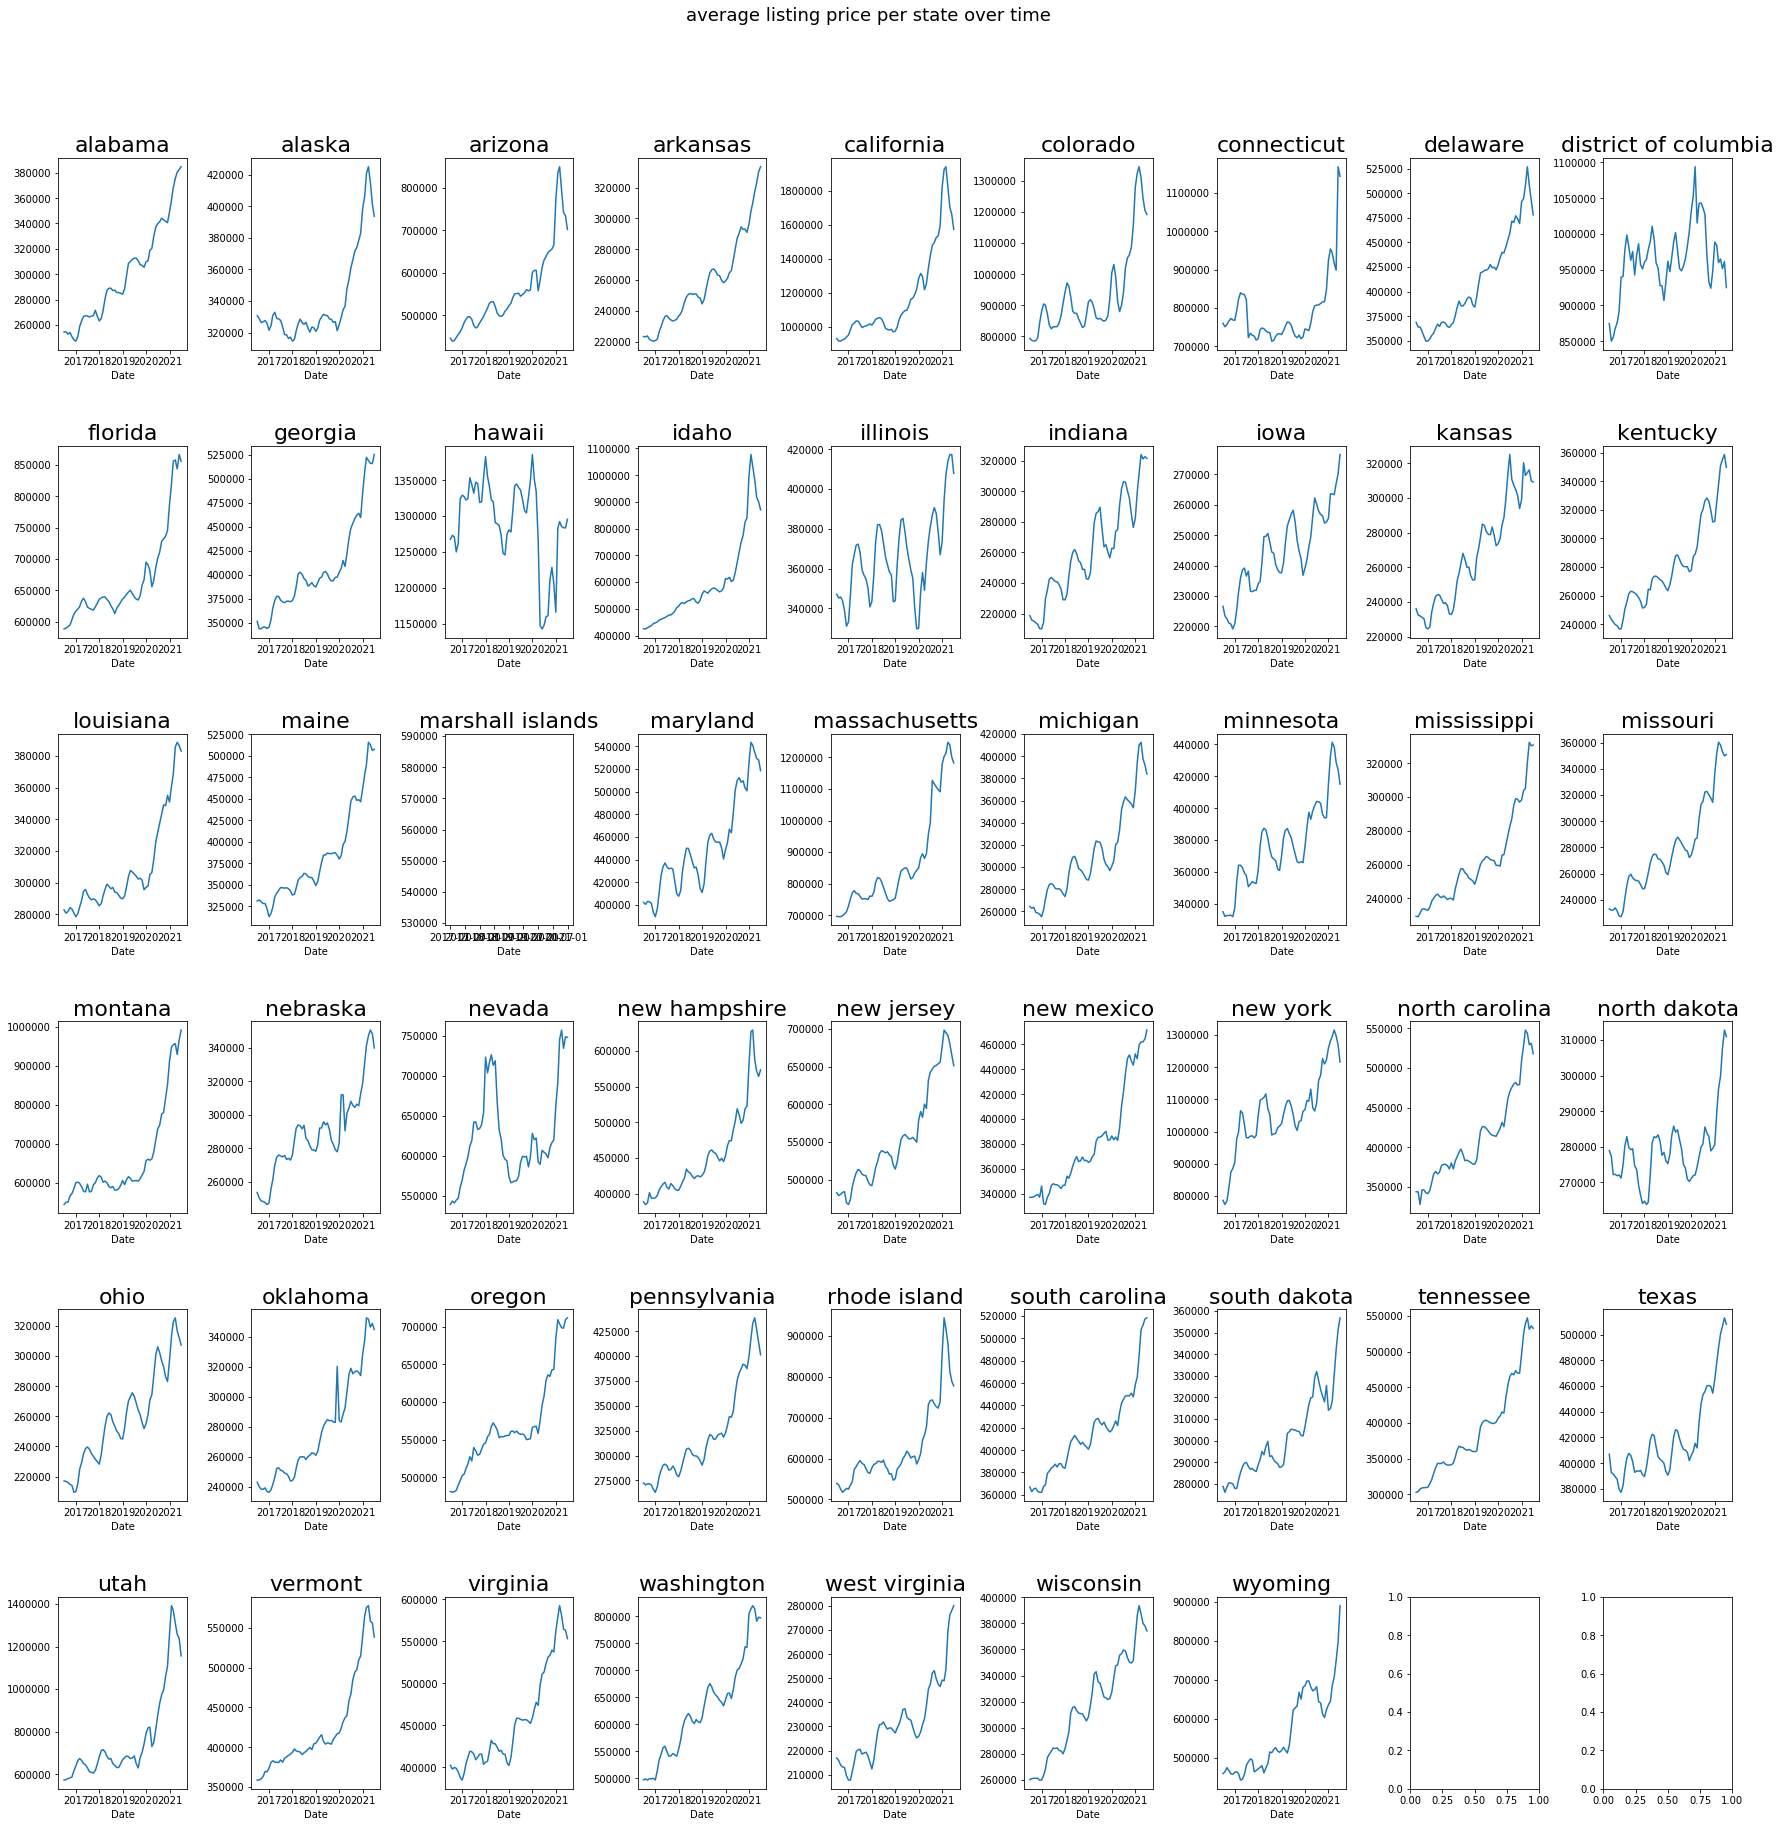

<Figure size 432x288 with 0 Axes>

In [12]:
fig, axs = plt.subplots(nrows=6, ncols=9, figsize=(30, 30))
fig.suptitle("average listing price per state over time", fontsize=18, y=0.95)
plt.subplots_adjust(hspace=0.5, wspace = 0.5)
state = df.state.unique()
plt.figure()
for i, ax in zip(state,axs.ravel()):
    temp = df[df.state == i]
    temp.groupby(['Date'])['average_listing_price'].mean().plot(ax = ax)
    ax.set_title(i, fontsize = 22)

the plots of each state are insiteful however, it may be too much to digest. instead of analysing this information graphically, it will be best to dive in numerically. we will find which states had the largest price increase within the data we have. this will be done by finding the percent price change between the minimum average price and largest average price 
$(\frac{\text{maximum average price} - \text{minimum average price}}{\text{minimum average price}}) * 100$ and comparing them with one another.

In [13]:
perc = []
for i in state:
    temp = df[df.state == i]
    temp.groupby(['Date'])['average_listing_price'].mean()
    pricechange = max(temp['average_listing_price']) - min(temp['average_listing_price'])
    percentchange = ((pricechange)) / min(temp['average_listing_price']) * 100
    perc.append([i,percentchange])

now that we have a list of the states along with thier corresponding percent changes, a new data frame will be created simply for its readability. 

In [14]:
columns = ['state', 'percent change']
perc = pd.DataFrame(perc, columns = columns)
perc.sort_values(by = 'percent change', ascending = False).head(10)

,state,percent change
12,idaho,153.596374
45,utah,143.159192
4,california,112.201266
51,wyoming,101.482744
2,arizona,93.176629
40,rhode island,82.460801
27,montana,82.395320
43,tennessee,80.600797
22,massachusetts,79.573126
5,colorado,71.585273


we can see that Idaho, Utah, California, Wyoming, and Arizona have experienced the largest average price increrase between 2016 and 2021, this is a good indicator of growth within the state however, many of these states have a market correction later in the year 2021 as seen below with the exception of wyoming

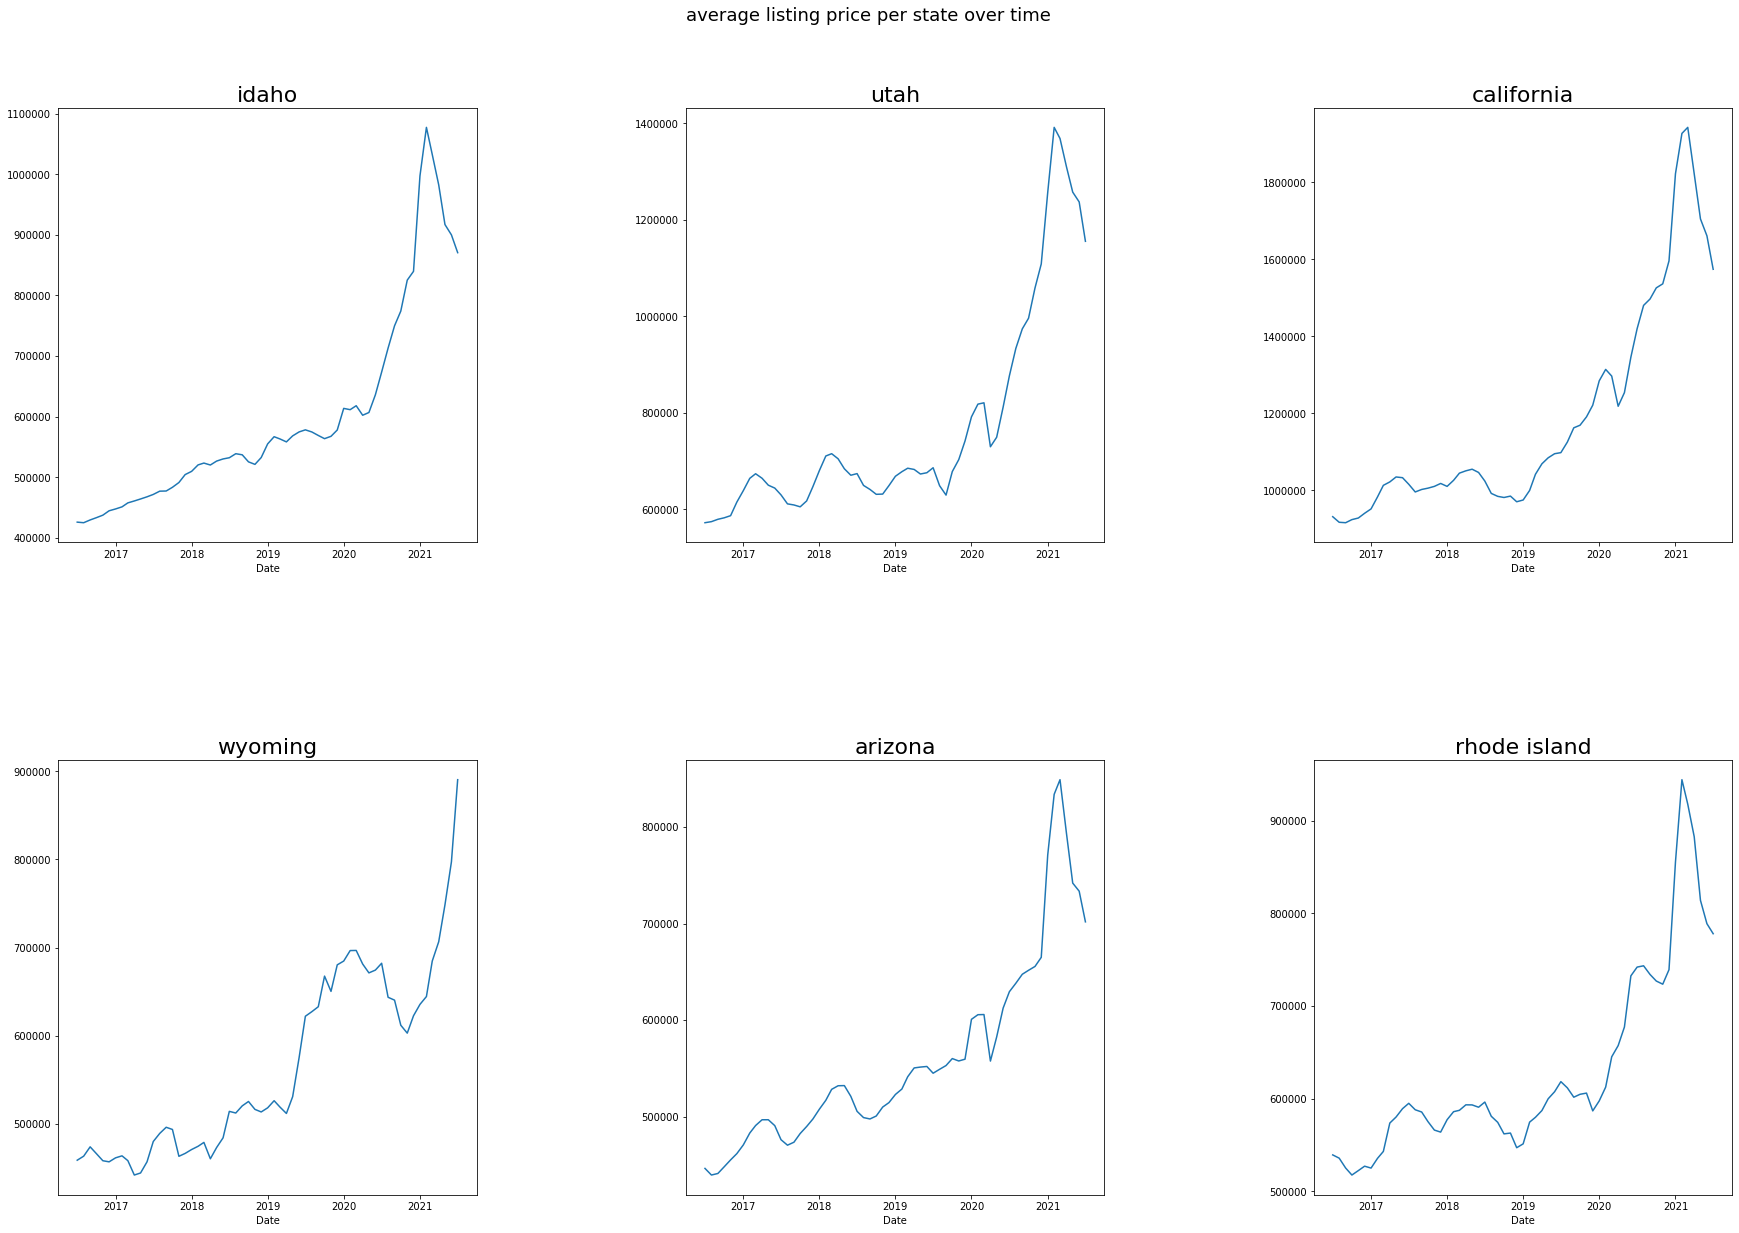

<Figure size 432x288 with 0 Axes>

In [15]:
mystates = ['idaho', 'utah', 'california', 'wyoming', 'arizona', 'rhode island']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30, 20))
fig.suptitle("average listing price per state over time", fontsize=18, y=0.95)
plt.subplots_adjust(hspace=0.5, wspace = 0.5)
state = df.state.unique()
plt.figure()
for i, ax in zip(mystates,axs.ravel()):
    temp = df[df.state == i]
    temp.groupby(['Date'])['average_listing_price'].mean().plot(ax = ax)
    ax.set_title(i, fontsize = 22)

reguardless of the tail end of 2021's market correction, these are plotted in decending order with idaho having the largest net price growth and rhode island having the least net price growth of the 6 states.

when investing in realestate, finding a state with increasing prices is a good thing because the value of the home will increase. now that we have the top 6 states which experienced the most growth, we can dig a little deeper. the following dataset contains zipcode information wich can allow us to narrow down which cities would be best to concider

## 1b. zipcode data

In [16]:
dfzip = pd.read_csv('RDC_Inventory_Core_Metrics_Zip_History.csv')
dfzip.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,month_date_yyyymm,postal_code,zip_name,flag,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,...,median_square_feet_yy,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy
0,202107,33029,"hollywood, fl",*,589000.0,-0.0531,NaN,62.0,0.0333,-0.2874,...,-0.0544,604828.8916,-0.0577,0.1723,199.0,0.0365,-0.1532,2.209677,0.0097,0.5085
1,202107,12778,"smallwood, ny",NaN,169000.0,-0.0315,0.1267,15.0,0.0714,-0.1667,...,-0.1950,183756.1875,0.0315,-0.1380,16.0,0.0667,-0.1579,0.066667,-0.0048,0.0111
2,202107,12309,"schenectady, ny",NaN,349900.0,-0.0266,-0.0458,71.0,0.2456,-0.2447,...,-0.0506,389398.2093,-0.0873,0.0273,226.0,0.0089,-0.0960,2.183099,-0.7467,0.5235
3,202107,74074,"stillwater, ok",*,249900.0,0.0038,NaN,62.0,0.3191,-0.4095,...,-0.0808,309726.5968,-0.1173,-0.1517,145.0,0.0741,-0.1104,1.338710,-0.5336,0.7863
4,202107,21128,"perry hall, md",*,400000.0,-0.0475,0.0013,14.0,-0.1250,NaN,...,0.1223,449739.0455,0.0110,0.0389,51.0,-0.0192,1.0400,2.642857,0.3929,2.3929


In [17]:
dfzip = pd.DataFrame(dfzip)
dfzip.head()

,month_date_yyyymm,postal_code,zip_name,flag,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,...,median_square_feet_yy,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy
0,202107,33029,"hollywood, fl",*,589000.0,-0.0531,NaN,62.0,0.0333,-0.2874,...,-0.0544,604828.8916,-0.0577,0.1723,199.0,0.0365,-0.1532,2.209677,0.0097,0.5085
1,202107,12778,"smallwood, ny",NaN,169000.0,-0.0315,0.1267,15.0,0.0714,-0.1667,...,-0.1950,183756.1875,0.0315,-0.1380,16.0,0.0667,-0.1579,0.066667,-0.0048,0.0111
2,202107,12309,"schenectady, ny",NaN,349900.0,-0.0266,-0.0458,71.0,0.2456,-0.2447,...,-0.0506,389398.2093,-0.0873,0.0273,226.0,0.0089,-0.0960,2.183099,-0.7467,0.5235
3,202107,74074,"stillwater, ok",*,249900.0,0.0038,NaN,62.0,0.3191,-0.4095,...,-0.0808,309726.5968,-0.1173,-0.1517,145.0,0.0741,-0.1104,1.338710,-0.5336,0.7863
4,202107,21128,"perry hall, md",*,400000.0,-0.0475,0.0013,14.0,-0.1250,NaN,...,0.1223,449739.0455,0.0110,0.0389,51.0,-0.0192,1.0400,2.642857,0.3929,2.3929


In [18]:
dfzip.info()
# column 'month_date_yyyymm' is of type object? strange. looking into this

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913084 entries, 0 to 913083
Data columns (total 40 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   month_date_yyyymm                        913084 non-null  object 
 1   postal_code                              913084 non-null  object 
 2   zip_name                                 913083 non-null  object 
 3   flag                                     110663 non-null  object 
 4   median_listing_price                     913083 non-null  float64
 5   median_listing_price_mm                  714901 non-null  float64
 6   median_listing_price_yy                  655505 non-null  float64
 7   active_listing_count                     913083 non-null  float64
 8   active_listing_count_mm                  714900 non-null  float64
 9   active_listing_count_yy                  656222 non-null  float64
 10  median_days_on_market           

In [19]:
dfzip['month_date_yyyymm'].value_counts()
# why does the this contain '* year-over-year figures may be impacted' in it?

201608                                      17334
201609                                      17291
201610                                      17201
201709                                      16903
201611                                      16771
                                            ...  
202102                                       9772
202104                                       9663
202103                                       9646
201607                                       5435
* year-over-year figures may be impacted        1
Name: month_date_yyyymm, Length: 63, dtype: int64

In [20]:
dfzip['month_date_yyyymm'].tail(1)
#the last row in this column is a note. we must drop this before proceeding or else
#we will be unable to confirt it to dtype datetime

913083    * year-over-year figures may be impacted
Name: month_date_yyyymm, dtype: object

In [21]:
dfzip.drop(dfzip.tail(1).index,inplace=True) 
dfzip = dfzip.drop(['flag'], axis=1)

In [22]:
Date = {'month_date_yyyymm':'Date'}
dfzip['month_date_yyyymm'] = pd.to_datetime(dfzip['month_date_yyyymm'],format = '%Y%m')
dfzip.rename(columns= Date, inplace=True)

dfzip['Month'] = dfzip['Date'].dt.month
dfzip['Year'] = dfzip['Date'].dt.year
dfzip['Date'] = dfzip['Date'].dt.date

In [23]:
dfzip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913083 entries, 0 to 913082
Data columns (total 41 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Date                                     913083 non-null  object 
 1   postal_code                              913083 non-null  object 
 2   zip_name                                 913083 non-null  object 
 3   median_listing_price                     913083 non-null  float64
 4   median_listing_price_mm                  714901 non-null  float64
 5   median_listing_price_yy                  655505 non-null  float64
 6   active_listing_count                     913083 non-null  float64
 7   active_listing_count_mm                  714900 non-null  float64
 8   active_listing_count_yy                  656222 non-null  float64
 9   median_days_on_market                    913083 non-null  float64
 10  median_days_on_market_mm        

In [24]:
#dfzip.dropna(inplace = True)

In [25]:
dfzip.head()

,Date,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,Month,Year
0,2021-07-01,33029,"hollywood, fl",589000.0,-0.0531,NaN,62.0,0.0333,-0.2874,49.0,...,-0.0577,0.1723,199.0,0.0365,-0.1532,2.209677,0.0097,0.5085,7,2021
1,2021-07-01,12778,"smallwood, ny",169000.0,-0.0315,0.1267,15.0,0.0714,-0.1667,68.0,...,0.0315,-0.1380,16.0,0.0667,-0.1579,0.066667,-0.0048,0.0111,7,2021
2,2021-07-01,12309,"schenectady, ny",349900.0,-0.0266,-0.0458,71.0,0.2456,-0.2447,36.0,...,-0.0873,0.0273,226.0,0.0089,-0.0960,2.183099,-0.7467,0.5235,7,2021
3,2021-07-01,74074,"stillwater, ok",249900.0,0.0038,NaN,62.0,0.3191,-0.4095,24.0,...,-0.1173,-0.1517,145.0,0.0741,-0.1104,1.338710,-0.5336,0.7863,7,2021
4,2021-07-01,21128,"perry hall, md",400000.0,-0.0475,0.0013,14.0,-0.1250,NaN,40.0,...,0.0110,0.0389,51.0,-0.0192,1.0400,2.642857,0.3929,2.3929,7,2021


In [26]:
dfzip.rename(columns={'postal_code': 'ZipCode'}, inplace=True)
dfzip['ZipCode'] = dfzip['ZipCode'].astype('str') 
dfzip['ZipCode'] = dfzip['ZipCode'].apply(lambda x: x.zfill(5))

In [27]:
dfzip[['city','State']] = dfzip['zip_name'].str.split(',',expand=True)
dfzip['State'] = dfzip['State'].str.lstrip().str.upper()
dfzip['city'] = dfzip['city'].str.title()
dfzip

,Date,ZipCode,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,Month,Year,city,State
0,2021-07-01,33029,"hollywood, fl",589000.0,-0.0531,NaN,62.0,0.0333,-0.2874,49.0,...,199.0,0.0365,-0.1532,2.209677,0.0097,0.5085,7,2021,Hollywood,FL
1,2021-07-01,12778,"smallwood, ny",169000.0,-0.0315,0.1267,15.0,0.0714,-0.1667,68.0,...,16.0,0.0667,-0.1579,0.066667,-0.0048,0.0111,7,2021,Smallwood,NY
2,2021-07-01,12309,"schenectady, ny",349900.0,-0.0266,-0.0458,71.0,0.2456,-0.2447,36.0,...,226.0,0.0089,-0.0960,2.183099,-0.7467,0.5235,7,2021,Schenectady,NY
3,2021-07-01,74074,"stillwater, ok",249900.0,0.0038,NaN,62.0,0.3191,-0.4095,24.0,...,145.0,0.0741,-0.1104,1.338710,-0.5336,0.7863,7,2021,Stillwater,OK
4,2021-07-01,21128,"perry hall, md",400000.0,-0.0475,0.0013,14.0,-0.1250,NaN,40.0,...,51.0,-0.0192,1.0400,2.642857,0.3929,2.3929,7,2021,Perry Hall,MD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913078,2016-07-01,31636,"lake park, ga",249900.0,NaN,NaN,66.0,NaN,NaN,128.0,...,66.0,NaN,NaN,0.000000,NaN,NaN,7,2016,Lake Park,GA
913079,2016-07-01,01245,"monterey, ma",699000.0,NaN,NaN,38.0,NaN,NaN,132.0,...,42.0,NaN,NaN,0.105263,NaN,NaN,7,2016,Monterey,MA
913080,2016-07-01,91104,"pasadena, ca",775000.0,NaN,NaN,52.0,NaN,NaN,38.0,...,92.0,NaN,NaN,0.769231,NaN,NaN,7,2016,Pasadena,CA
913081,2016-07-01,37917,"knoxville, tn",94900.0,NaN,NaN,110.0,NaN,NaN,73.0,...,177.0,NaN,NaN,0.609091,NaN,NaN,7,2016,Knoxville,TN


zip code to longitude/lattitude
https://zipcodedownload.com/ZipCodeApi
http://www.zip-code-database.com/


In [28]:
dfzip.head()

,Date,ZipCode,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,Month,Year,city,State
0,2021-07-01,33029,"hollywood, fl",589000.0,-0.0531,NaN,62.0,0.0333,-0.2874,49.0,...,199.0,0.0365,-0.1532,2.209677,0.0097,0.5085,7,2021,Hollywood,FL
1,2021-07-01,12778,"smallwood, ny",169000.0,-0.0315,0.1267,15.0,0.0714,-0.1667,68.0,...,16.0,0.0667,-0.1579,0.066667,-0.0048,0.0111,7,2021,Smallwood,NY
2,2021-07-01,12309,"schenectady, ny",349900.0,-0.0266,-0.0458,71.0,0.2456,-0.2447,36.0,...,226.0,0.0089,-0.0960,2.183099,-0.7467,0.5235,7,2021,Schenectady,NY
3,2021-07-01,74074,"stillwater, ok",249900.0,0.0038,NaN,62.0,0.3191,-0.4095,24.0,...,145.0,0.0741,-0.1104,1.338710,-0.5336,0.7863,7,2021,Stillwater,OK
4,2021-07-01,21128,"perry hall, md",400000.0,-0.0475,0.0013,14.0,-0.1250,NaN,40.0,...,51.0,-0.0192,1.0400,2.642857,0.3929,2.3929,7,2021,Perry Hall,MD


In [29]:
dfzip.isna().sum()

Date                                            0
ZipCode                                         0
zip_name                                        0
median_listing_price                            0
median_listing_price_mm                    198182
median_listing_price_yy                    257578
active_listing_count                            0
active_listing_count_mm                    198183
active_listing_count_yy                    256861
median_days_on_market                           0
median_days_on_market_mm                   198182
median_days_on_market_yy                   262937
new_listing_count                               0
new_listing_count_mm                       273007
new_listing_count_yy                       277642
price_increased_count                           0
price_increased_count_mm                   822946
price_increased_count_yy                   825302
price_reduced_count                             0
price_reduced_count_mm                     349261


Just to get a different sence of visualization, i will plot several violin plots of this data grouped by states

In [30]:
my_columns = ['median_listing_price','median_days_on_market','price_increased_count','new_listing_count',
             'price_reduced_count','average_listing_price','total_listing_count','median_listing_price_per_square_foot']

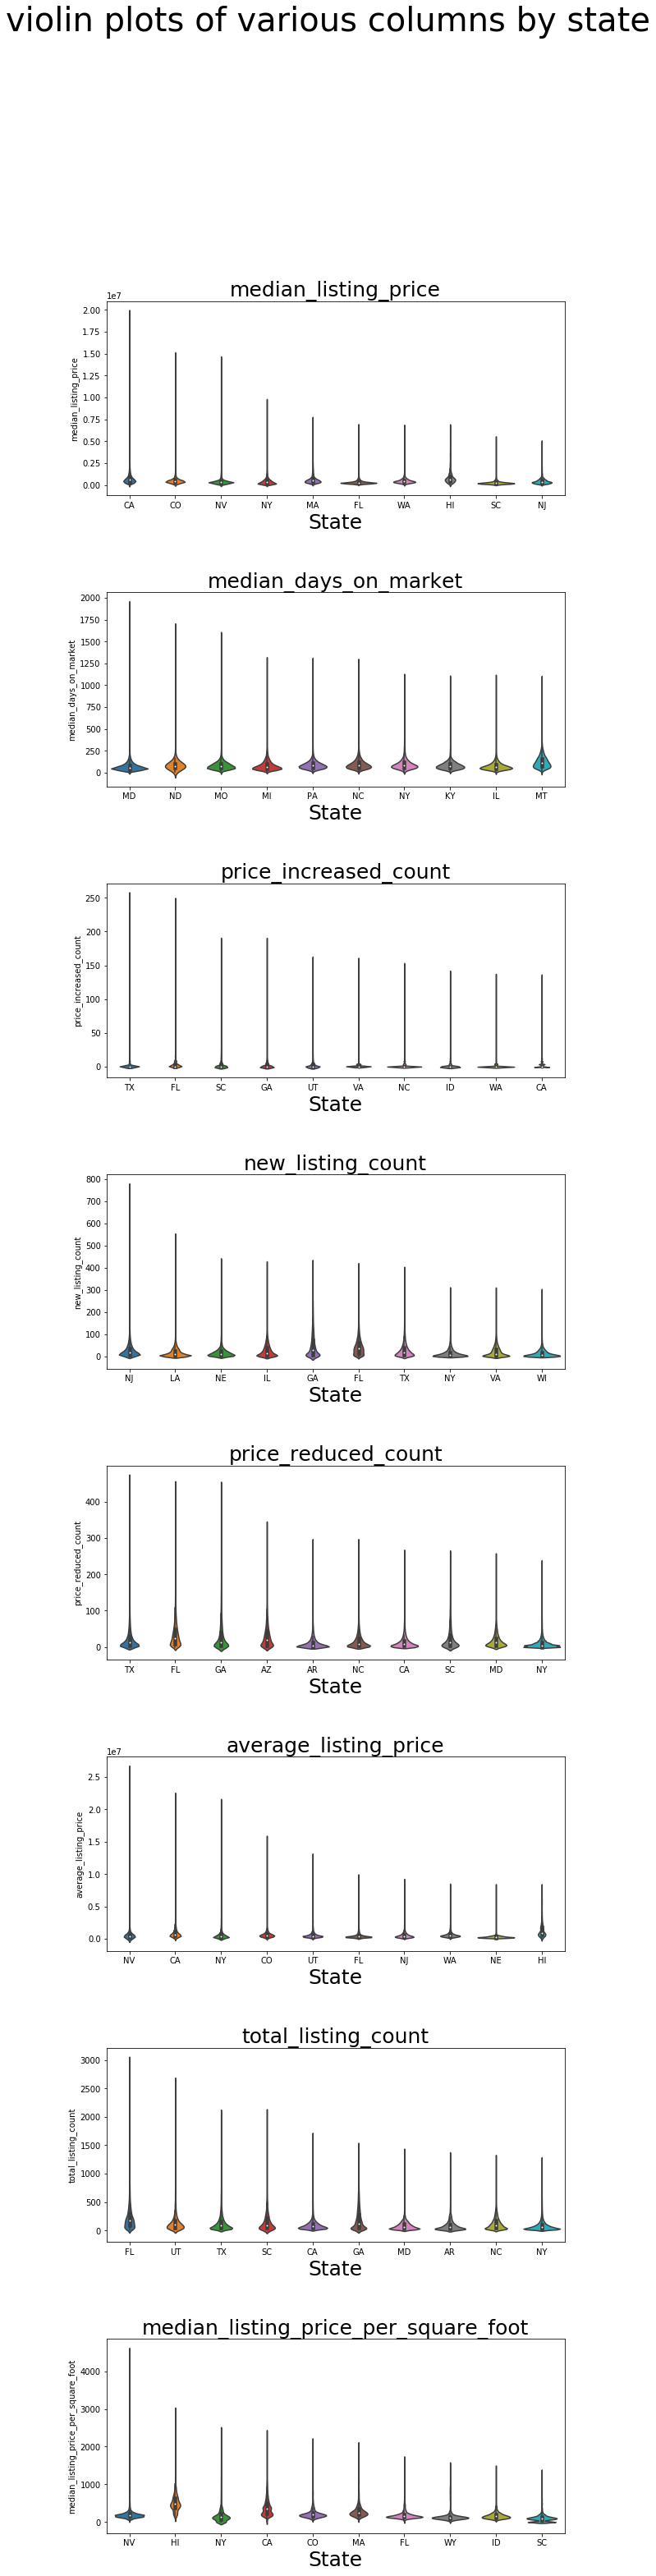

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [31]:
fig, axs = plt.subplots(nrows = 8, ncols = 1, figsize = (10, 50))
fig.suptitle('violin plots of various columns by state', fontsize = 40)
plt.subplots_adjust(hspace=0.5)

for i, ax in zip(my_columns, axs.ravel()):
    mylist = dfzip.sort_values(by = i, ascending = False)
    plt.figure()
    dummylist = mylist.loc[mylist['State'].isin(mylist['State'].unique().tolist()[:10])]
    sns.violinplot(data = dummylist, x = 'State', y = i, ax = ax)
    ax.set_title(i, fontsize = 25)
    ax.set_xlabel('State', fontsize = 25)  
    plt.rc('xtick', labelsize=30)

these graphs can be dense to interpret so the following will cleanly translate. 

in order, the top to states with highest median days on the market meanining
1. Maryland
2. North Dekota
3. missouri
4. Michigan
5. Pennsylvania
6. North Carolina
7. New York
8. Kentucky
9. illinois
10. Montana <br>

states which increase thier prices the most
1. Texas
2. Florida
3. South Carolina
4. Georgia
5. Utah
6. Virginia
7. North Carolina
8. Idaho
9. Washington
10. California

States that Experience the most new listings
1. New Jersey
2. Louisiana
3. Nebraska
4. Illinois
5. Georgia
6. Florida
7. Texas
8. New York
9. Virginia
10. Wisconsin 

states which experienced the most price reduction
1. Texas
2. Florida
3. Georgia
4. Arizona
5. Arkansas
6. North Carolina
7. California
8. South Carolina
9. Maryland
10. New York

average listing price by state
1. Nevada
2. California
3. New York
4. Colorado
5. Utah
6. Florida
7. New Jersey
8. Washington
9. Nebraska
10. Hawaii

total listing count in order 
1. Florida
2. Utah
3. Texas
4. South Carolina
5. California
6. Georgia
7. Maryland
8. Arkansas
9. North Carolina
10. New York <br>

lowest days on the market <br>
1. District of Columbia
2. Oklahoma
3. Rhode Island
4. South Dakota
5. Hawaii
6. New Hampshire
7. Utah
8. Nevada
9. Alaska
10. Tennessee <br>



highest listing price per sqare foot sorted by state
1. Nevada
2. Hawaii
3. New York
4. California
5. Colorado
6. Massachusetts
7. Florida
8. Wyoming
9. Idaho
10. South Carolina

In [32]:
State = dfzip.State.unique()

In [33]:
percent = []
for i in State:
    temp1 = dfzip[dfzip.State == i]
    temp1.groupby(['Date'])['average_listing_price'].mean()
    pricechange1 = max(temp1['average_listing_price']) - min(temp1['average_listing_price'])
    percentchangezip = ((pricechange1)) / min(temp1['average_listing_price']) * 100
    percent.append([i,percentchangezip])

In [34]:
col = ['State', 'percentincrease']
percent = pd.DataFrame(percent, columns = col)


In [35]:
percent.sort_values(by = 'percentincrease', ascending = False).head(10)

,State,percentincrease
41,MT,261037.529152
1,NY,101689.731801
10,CA,86097.754751
8,MI,61207.183264
16,NV,49108.478672
14,TX,36031.067332
42,UT,28277.640911
23,PA,23588.327238
0,FL,22679.447240
7,NJ,20288.820121


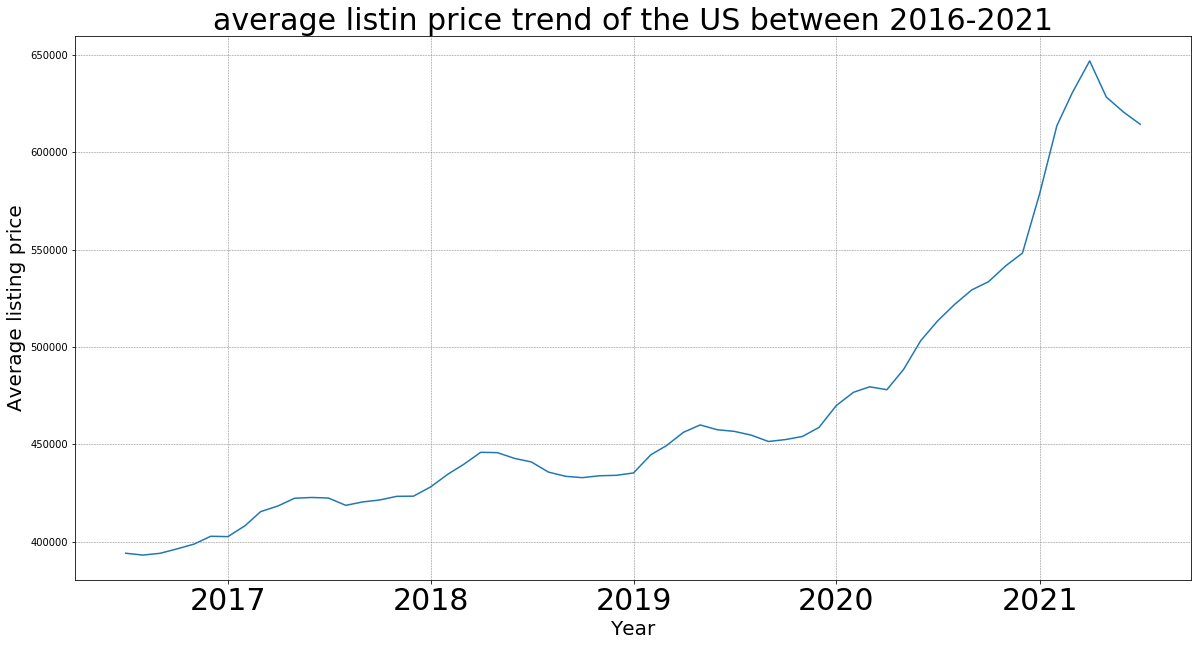

In [36]:
plt.figure(figsize=(20, 10))
avglisting = dfzip.groupby(['Date'])['average_listing_price'].mean()
_ = plt.plot(avglisting)
_ = plt.grid(color='grey', linestyle='--', linewidth=0.5)
_ = plt.xlabel('Year', fontsize = 20)
_ = plt.ylabel('Average listing price', fontsize = 20)
_= plt.title('average listin price trend of the US between 2016-2021', fontsize = 30)

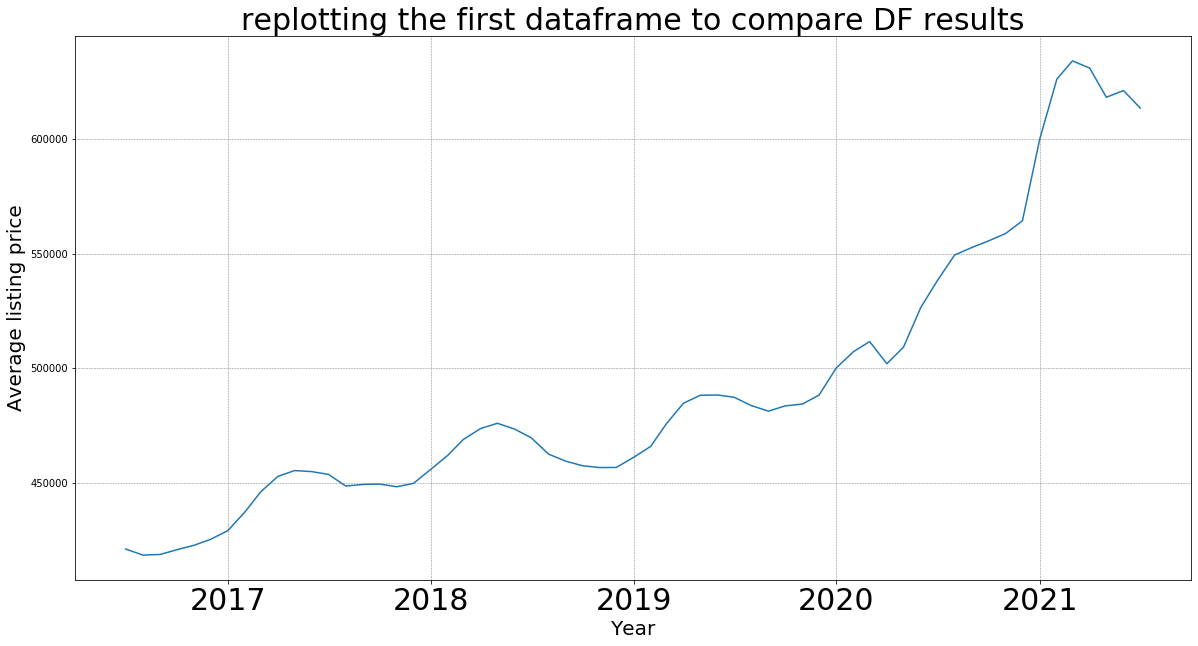

In [40]:
plt.figure(figsize=(20, 10))
avglisting = df.groupby(['Date'])['average_listing_price'].mean()
_ = plt.plot(avglisting)
_ = plt.grid(color='grey', linestyle='--', linewidth=0.5)
_ = plt.xlabel('Year', fontsize = 20)
_ = plt.ylabel('Average listing price', fontsize = 20)
_= plt.title('replotting the first dataframe to compare DF results', fontsize = 30)

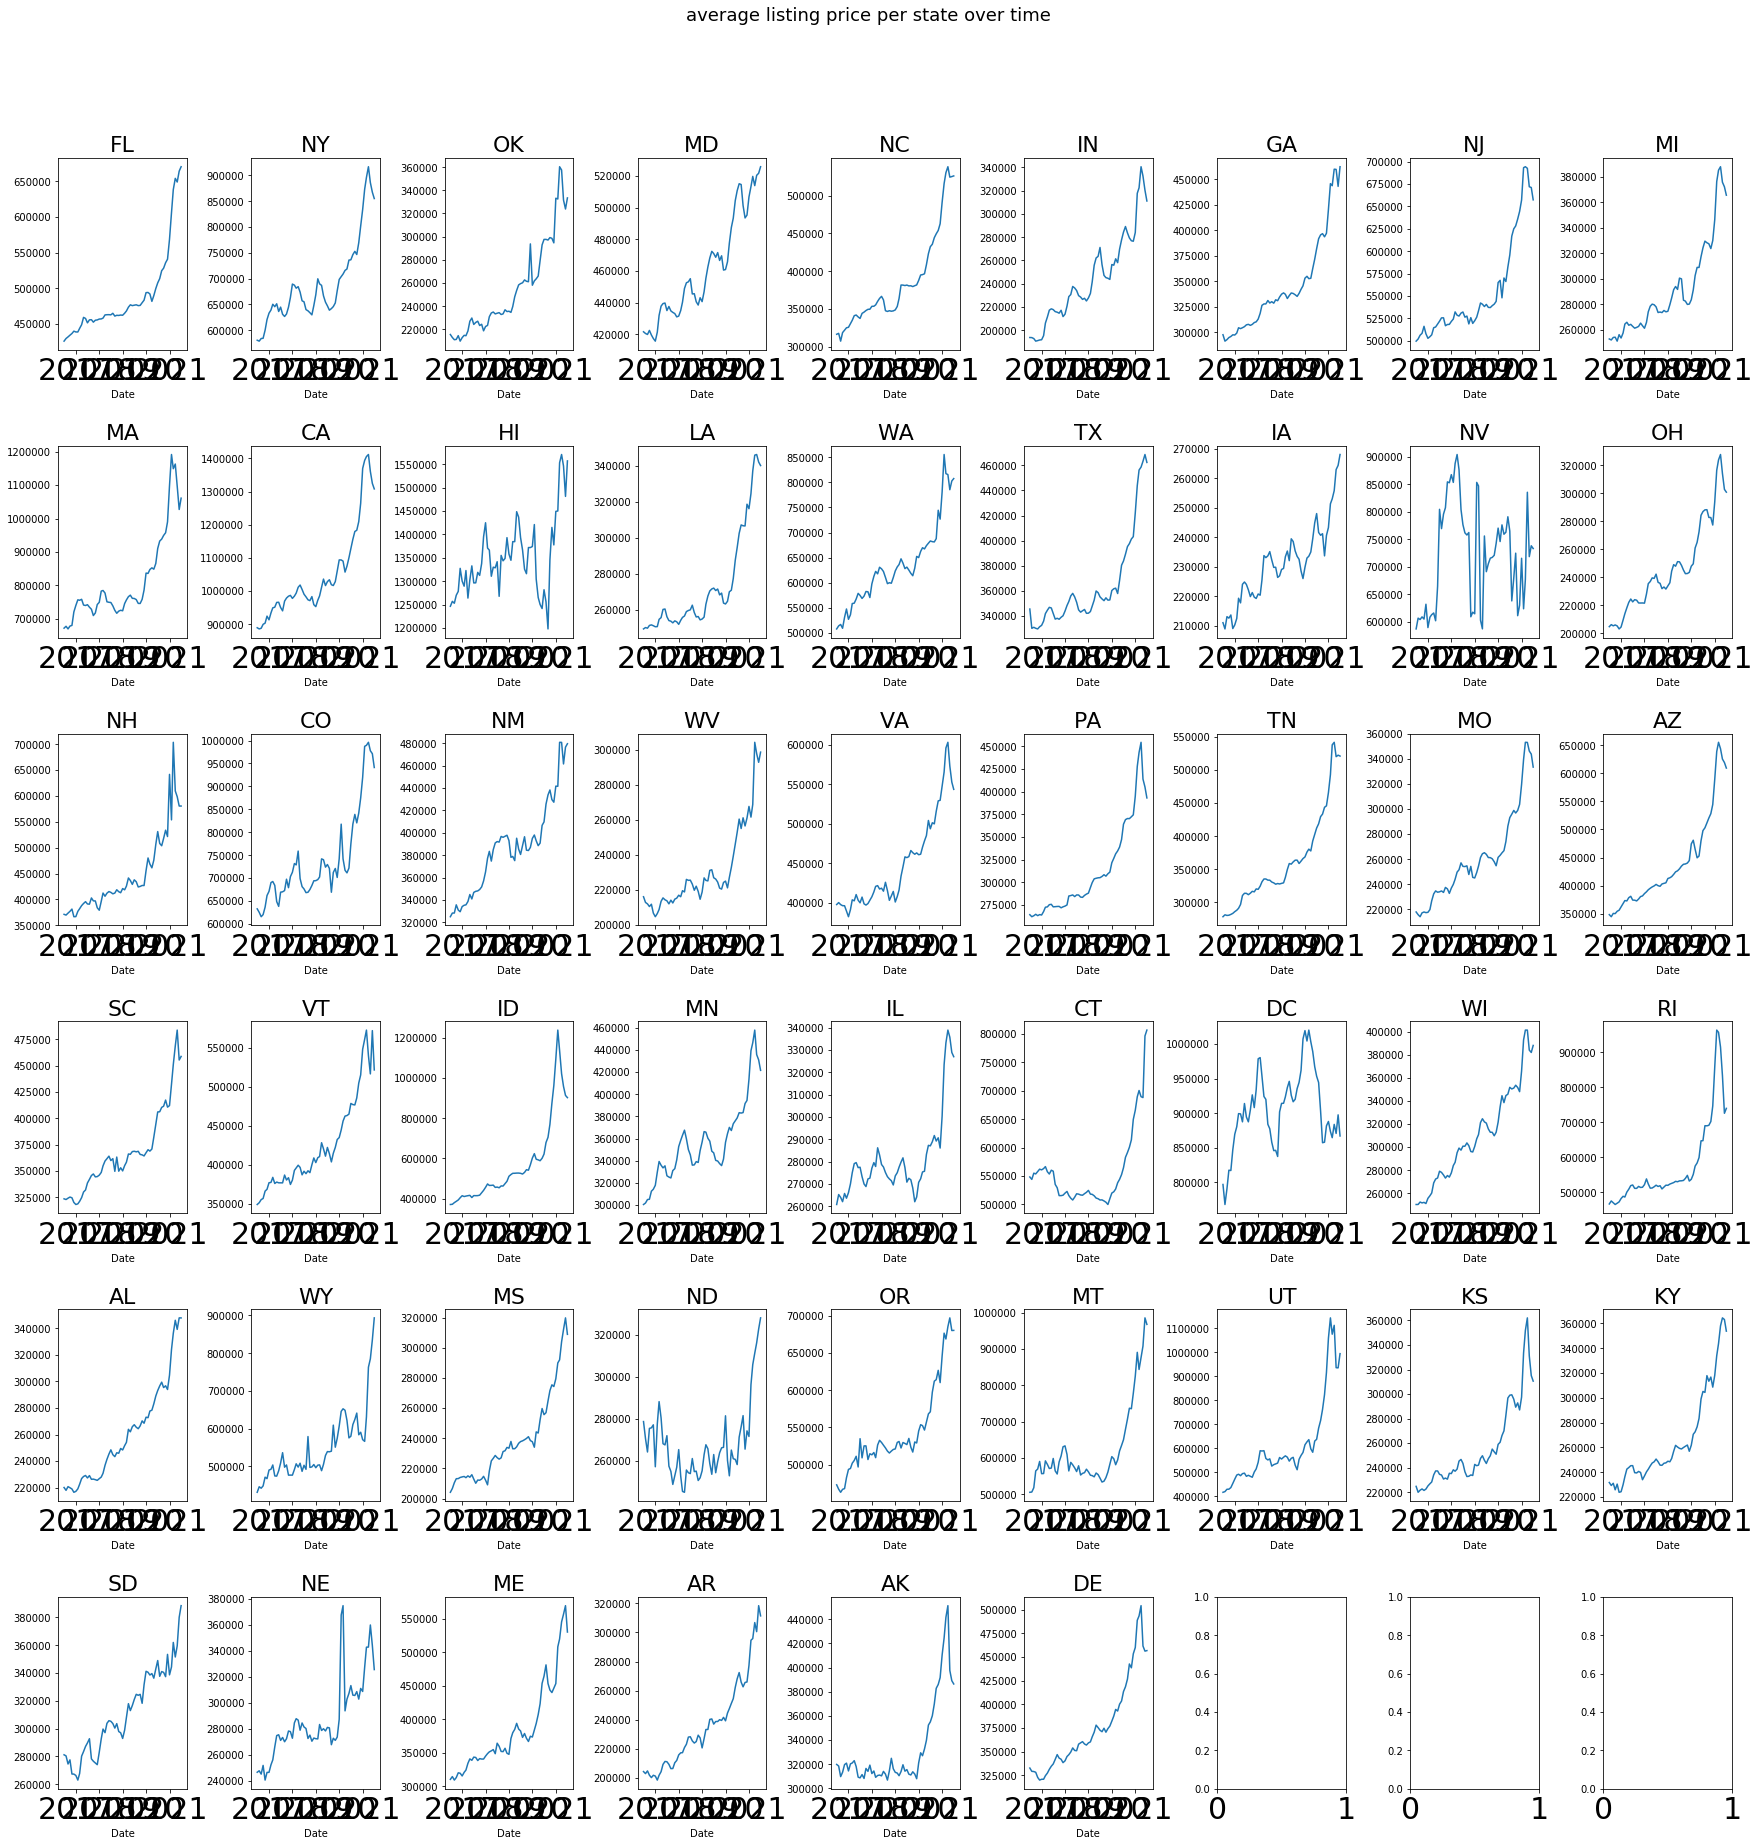

<Figure size 432x288 with 0 Axes>

In [37]:
fig, axs = plt.subplots(nrows=6, ncols=9, figsize=(30, 30))
fig.suptitle("average listing price per state over time", fontsize=18, y=0.95)
plt.subplots_adjust(hspace=0.5, wspace = 0.5)
state = dfzip.State.unique()
plt.figure()
for i, ax in zip(state,axs.ravel()):
    temp = dfzip[dfzip.State == i]
    temp.groupby(['Date'])['average_listing_price'].mean().plot(ax = ax)
    ax.set_title(i, fontsize = 22)

In [66]:
percent.sort_values(by = 'percentincrease', ascending = False).head(10)

,State,percentincrease
41,MT,261037.529152
1,NY,101689.731801
10,CA,86097.754751
8,MI,61207.183264
16,NV,49108.478672
14,TX,36031.067332
42,UT,28277.640911
23,PA,23588.327238
0,FL,22679.447240
7,NJ,20288.820121


In [67]:
perc.sort_values(by = 'percent change', ascending = False).head(10)

,state,percent change
12,idaho,153.596374
45,utah,143.159192
4,california,112.201266
51,wyoming,101.482744
2,arizona,93.176629
40,rhode island,82.460801
27,montana,82.395320
43,tennessee,80.600797
22,massachusetts,79.573126
5,colorado,71.585273


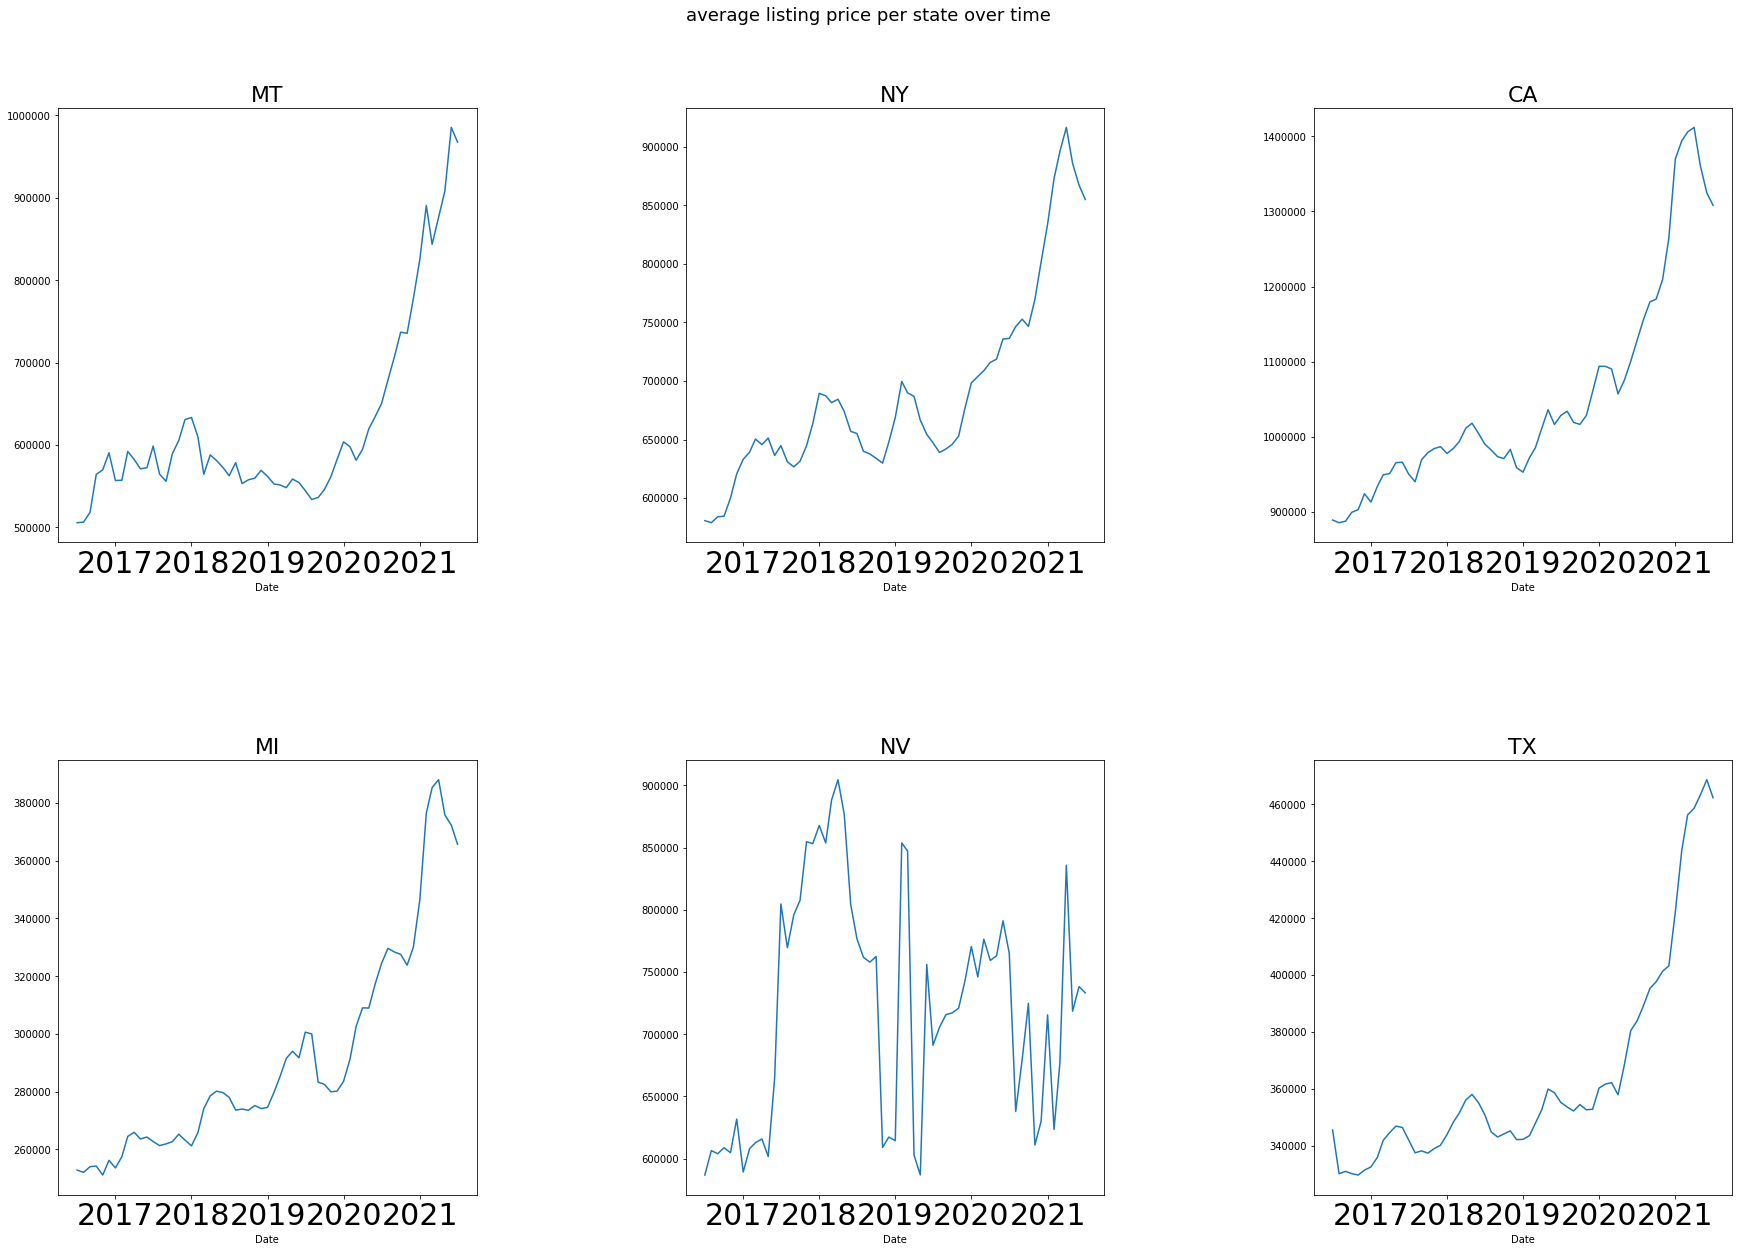

<Figure size 432x288 with 0 Axes>

In [70]:
mystates = ['MT', 'NY', 'CA', 'MI', 'NV', 'TX']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30, 20))
fig.suptitle("average listing price per state over time", fontsize=18, y=0.95)
plt.subplots_adjust(hspace=0.5, wspace = 0.5)
state = df.state.unique()
plt.figure()
for i, ax in zip(mystates,axs.ravel()):
    temp = dfzip[dfzip.State == i]
    temp.groupby(['Date'])['average_listing_price'].mean().plot(ax = ax)
    ax.set_title(i, fontsize = 22)

the First DF and the second DF yirld diiferent results when it pertains to anual high and low prices. i will now show the opening prices in comparison to the latest prices in each data frame to see if they allign in that manner

In [101]:
percent1 = []
for i in State:
    temp1 = dfzip[dfzip.State == i]
    temp1.groupby(['Date'])['average_listing_price'].mean()
    pricechange1 = (temp1['average_listing_price'].iloc[-1]) - (temp1['average_listing_price'].iloc[0])
    percentchangezip = ((pricechange1)) / (temp1['average_listing_price'].iloc[0]) * 100
    percent1.append([i,percentchangezip])

In [102]:
pd.DataFrame(percent, columns = columns).head(10)

,state,percent change
0,alabama,51.175995
1,alaska,19.029664
2,arizona,57.214655
3,arkansas,49.406977
4,california,69.032225
5,colorado,50.365761
6,connecticut,50.457230
7,delaware,29.646415
8,district of columbia,5.765073
9,florida,45.371616


In [103]:
percent2 = []
for i in state:
    temp1 = df[df.state == i]
    temp1.groupby(['Date'])['average_listing_price'].mean()
    pricechange1 = (temp1['average_listing_price'].iloc[-1]) - (temp1['average_listing_price'].iloc[0])
    percentchangezip = ((pricechange1)) / (temp1['average_listing_price'].iloc[0]) * 100
    percent2.append([i,percentchangezip])

In [104]:
print('percent price icrease by state for the zipcode dataframe(the second dataframe analized in this notebook)')
display(pd.DataFrame(percent1, columns = columns).head(10))
print('percent price increase by state for the state dataframe (the first dataframe analized in this notebook)')
display(pd.DataFrame(percent2, columns = col).head(10))

percent price icrease by state for the zipcode dataframe(the second dataframe analized in this notebook)


,state,percent change
0,AK,4.719815
1,AL,-78.634979
2,AR,-59.564233
3,AZ,-78.881502
4,CA,-21.269520
5,CO,-3.054841
6,CT,101.689495
7,DC,32.421146
8,DE,5.045344
9,FL,-25.463889


percent price increase by state for the state dataframe (the first dataframe analized in this notebook)


,State,percentincrease
0,alabama,51.175995
1,alaska,19.029664
2,arizona,57.214655
3,arkansas,49.406977
4,california,69.032225
5,colorado,50.365761
6,connecticut,50.457230
7,delaware,29.646415
8,district of columbia,5.765073
9,florida,45.371616


as we can see, the two dataframes do not allign with one another in terms of the annual increase of prices which will yield differing results. 